In [1]:
%load_ext autoreload
%autoreload 2

import os
os.chdir('/glade/u/home/fengzhu/Github/x4c/docsrc/notebooks')
import x4c
print(x4c.__version__)

2024.6.28


In [2]:
dirpath = '/glade/campaign/univ/ubrn0018/fengzhu/CESM_output/timeseries/b.e13.B1850C5.ne16_g16.icesm131_d18O_fixer.Miocene.3xCO2.005'
case = x4c.Timeseries(dirpath, grid_dict={'atm': 'ne16np4'})

>>> case.root_dir: /glade/campaign/univ/ubrn0018/fengzhu/CESM_output/timeseries/b.e13.B1850C5.ne16_g16.icesm131_d18O_fixer.Miocene.3xCO2.005
>>> case.path_pattern: comp/proc/tseries/month_1/casename.mdl.h_str.vn.timespan.nc
>>> case.grid_dict: {'atm': 'ne16np4', 'ocn': 'g16', 'lnd': 'ne16np4', 'rof': 'ne16np4', 'ice': 'g16'}


>>> case.vars_info created


>>> case.ds["TS"] created
>>> case.diags["TS:ann:gm"] created


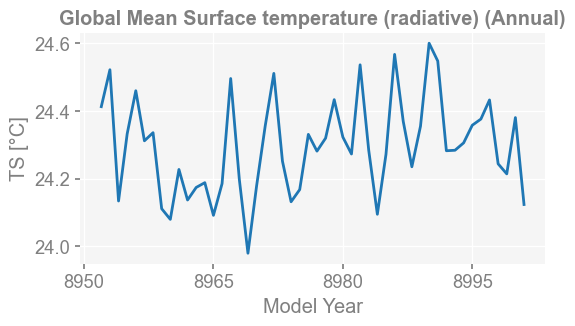

In [57]:
x4c.set_style('web', font_scale=1.2)
spell = 'TS:ann:gm'
case.calc(spell, load_idx=-1)
fig, ax = case.plot(spell)

In [58]:
# spell = 'T.isel(lev=0)|regrid'
# spell = 'T.isel(lev=0)|regrid(dlon=1, dlat=1)'
# print(S.regrid)
spell = 'T|plev(50000)'
S = x4c.spell.Spell(spell)
print(S.plev)

plev(50000)


In [52]:
case.ds['T']

<xarray.Dataset>
Dimensions:       (lev: 30, ilev: 31, ncol: 13826, time: 600, nbnd: 2)
Coordinates:
  * lev           (lev) float64 3.643 7.595 14.36 24.61 ... 957.5 976.3 992.6
  * ilev          (ilev) float64 2.255 5.032 10.16 18.56 ... 967.5 985.1 1e+03
  * time          (time) object 8951-01-31 00:00:00 ... 9000-12-31 00:00:00
Dimensions without coordinates: ncol, nbnd
Data variables: (12/32)
    hyam          (lev) float64 0.003643 0.007595 0.01436 ... 0.001989 0.0
    hybm          (lev) float64 ...
    P0            float64 ...
    hyai          (ilev) float64 ...
    hybi          (ilev) float64 ...
    lat           (ncol) float64 ...
    ...            ...
    f11vmr        (time) float64 ...
    f12vmr        (time) float64 ...
    sol_tsi       (time) float64 ...
    nsteph        (time) int32 ...
    T             (time, lev, ncol) float32 -38.13 -37.93 -37.61 ... 16.86 17.44
    gw            (ncol) float64 0.0001546 0.000515 ... 0.00129 0.001289
Attributes: (12/16)
    np:               4
    ne:               16
    Conventions:      CF-1.0
    source:           CAM
    case:             b.e13.B1850C5.ne16_g16.icesm131_d18O_fixer.Miocene.3xCO...
    title:            UNSET
    ...               ...
    initial_file:     /glade/campaign/cesm/cesmdata/inputdata/atm/cam/inic/ho...
    topography_file:  /glade/work/fengzhu/Projects/Miocene-on-Derecho/04.atm-...
    path:             /glade/campaign/univ/ubrn0018/fengzhu/CESM_output/times...
    vn:               T
    comp:             atm
    grid:             ne16np4

In [51]:
case.ds['PS']

<xarray.Dataset>
Dimensions:       (lev: 30, ilev: 31, ncol: 13826, time: 600, nbnd: 2)
Coordinates:
  * lev           (lev) float64 3.643 7.595 14.36 24.61 ... 957.5 976.3 992.6
  * ilev          (ilev) float64 2.255 5.032 10.16 18.56 ... 967.5 985.1 1e+03
  * time          (time) object 8951-01-31 00:00:00 ... 9000-12-31 00:00:00
Dimensions without coordinates: ncol, nbnd
Data variables: (12/32)
    hyam          (lev) float64 ...
    hybm          (lev) float64 ...
    P0            float64 ...
    hyai          (ilev) float64 ...
    hybi          (ilev) float64 ...
    lat           (ncol) float64 ...
    ...            ...
    f11vmr        (time) float64 ...
    f12vmr        (time) float64 ...
    sol_tsi       (time) float64 ...
    nsteph        (time) int32 ...
    PS            (time, ncol) float32 ...
    gw            (ncol) float64 ...
Attributes: (12/16)
    np:               4
    ne:               16
    Conventions:      CF-1.0
    source:           CAM
    case:             b.e13.B1850C5.ne16_g16.icesm131_d18O_fixer.Miocene.3xCO...
    title:            UNSET
    ...               ...
    initial_file:     /glade/campaign/cesm/cesmdata/inputdata/atm/cam/inic/ho...
    topography_file:  /glade/work/fengzhu/Projects/Miocene-on-Derecho/04.atm-...
    path:             /glade/campaign/univ/ubrn0018/fengzhu/CESM_output/times...
    vn:               PS
    comp:             atm
    grid:             ne16np4

In [72]:
case.ds['T'].x.get_plev(ps=PS)

<xarray.Dataset>
Dimensions:       (lev: 30, ilev: 31, ncol: 13826, time: 600, nbnd: 2, plev: 21)
Coordinates:
  * lev           (lev) float64 3.643 7.595 14.36 24.61 ... 957.5 976.3 992.6
  * ilev          (ilev) float64 2.255 5.032 10.16 18.56 ... 967.5 985.1 1e+03
  * time          (time) object 8951-01-31 00:00:00 ... 9000-12-31 00:00:00
  * plev          (plev) float32 1e+05 9.25e+04 8.5e+04 ... 300.0 200.0 100.0
Dimensions without coordinates: ncol, nbnd
Data variables: (12/32)
    hyam          (lev) float64 0.003643 0.007595 0.01436 ... 0.001989 0.0
    hybm          (lev) float64 0.0 0.0 0.0 0.0 ... 0.9251 0.9512 0.9743 0.9926
    P0            float64 ...
    hyai          (ilev) float64 ...
    hybi          (ilev) float64 ...
    lat           (ncol) float64 ...
    ...            ...
    f11vmr        (time) float64 ...
    f12vmr        (time) float64 ...
    sol_tsi       (time) float64 ...
    nsteph        (time) int32 ...
    gw            (ncol) float64 ...
    T             (time, plev, ncol) float32 dask.array<chunksize=(600, 21, 13826), meta=np.ndarray>
Attributes: (12/16)
    np:               4
    ne:               16
    Conventions:      CF-1.0
    source:           CAM
    case:             b.e13.B1850C5.ne16_g16.icesm131_d18O_fixer.Miocene.3xCO...
    title:            UNSET
    ...               ...
    initial_file:     /glade/campaign/cesm/cesmdata/inputdata/atm/cam/inic/ho...
    topography_file:  /glade/work/fengzhu/Projects/Miocene-on-Derecho/04.atm-...
    path:             /glade/campaign/univ/ubrn0018/fengzhu/CESM_output/times...
    vn:               T
    comp:             atm
    grid:             ne16np4

In [5]:
spell = 'T|plev'
case.calc(spell)
case.diags[spell]

>>> case.ds["T"] already loaded; to reload, run case.clear_ds("T") before case.load("T")
>>> case.ds["PS"] already loaded; to reload, run case.clear_ds("PS") before case.load("PS")
{'lev_dim': 'lev'}
>>> case.diags["T|plev"] created


<xarray.DataArray 'T' (time: 600, plev: 21, ncol: 13826)>
dask.array<sub, shape=(600, 21, 13826), dtype=float32, chunksize=(600, 21, 13826), chunktype=numpy.ndarray>
Coordinates:
  * plev     (plev) float32 1e+05 9.25e+04 8.5e+04 7e+04 ... 300.0 200.0 100.0
  * time     (time) object 8951-01-31 00:00:00 ... 9000-12-31 00:00:00
Dimensions without coordinates: ncol
Attributes:
    mdims:         1
    units:         °C
    long_name:     Temperature
    cell_methods:  time: mean
    path:          /glade/campaign/univ/ubrn0018/fengzhu/CESM_output/timeseri...
    gw:            <xarray.DataArray 'gw' (ncol: 13826)>\n[13826 values with ...
    lat:           <xarray.DataArray 'lat' (ncol: 13826)>\n[13826 values with...
    lon:           <xarray.DataArray 'lon' (ncol: 13826)>\n[13826 values with...
    comp:          atm
    grid:          ne16np4

In [6]:
case.ds['T']

<xarray.Dataset>
Dimensions:       (lev: 30, ilev: 31, ncol: 13826, time: 600, nbnd: 2)
Coordinates:
  * lev           (lev) float64 3.643 7.595 14.36 24.61 ... 957.5 976.3 992.6
  * ilev          (ilev) float64 2.255 5.032 10.16 18.56 ... 967.5 985.1 1e+03
  * time          (time) object 8951-01-31 00:00:00 ... 9000-12-31 00:00:00
Dimensions without coordinates: ncol, nbnd
Data variables: (12/32)
    hyam          (lev) float64 0.003643 0.007595 0.01436 ... 0.001989 0.0
    hybm          (lev) float64 ...
    P0            float64 ...
    hyai          (ilev) float64 ...
    hybi          (ilev) float64 ...
    lat           (ncol) float64 ...
    ...            ...
    f11vmr        (time) float64 ...
    f12vmr        (time) float64 ...
    sol_tsi       (time) float64 ...
    nsteph        (time) int32 ...
    T             (time, lev, ncol) float32 ...
    gw            (ncol) float64 ...
Attributes: (12/16)
    np:               4
    ne:               16
    Conventions:      CF-1.0
    source:           CAM
    case:             b.e13.B1850C5.ne16_g16.icesm131_d18O_fixer.Miocene.3xCO...
    title:            UNSET
    ...               ...
    initial_file:     /glade/campaign/cesm/cesmdata/inputdata/atm/cam/inic/ho...
    topography_file:  /glade/work/fengzhu/Projects/Miocene-on-Derecho/04.atm-...
    path:             /glade/campaign/univ/ubrn0018/fengzhu/CESM_output/times...
    vn:               T
    comp:             atm
    grid:             ne16np4

In [14]:
# spell = 'T.isel(lev=0)'
# spell = 'T.isel(lev=0)|regrid'
# spell = 'T.isel(lev=0)|regrid(dlon=1, dlat=1)'
# spell = 'T.isel(lev=0)|regrid(dlon=2, dlat=2)'
# spell = 'T|plev'
# spell = 'T|plev(50000, 85000)'
spell = 'T|plev(50000)'
case.calc(spell)
case.diags[spell]

>>> case.ds["T"] already loaded; to reload, run case.clear_ds("T") before case.load("T")
>>> case.ds["PS"] already loaded; to reload, run case.clear_ds("PS") before case.load("PS")
>>> case.diags["T|plev(50000)"] created


<xarray.DataArray 'T' (time: 600, plev: 1, ncol: 13826)>
dask.array<sub, shape=(600, 1, 13826), dtype=float32, chunksize=(600, 1, 13826), chunktype=numpy.ndarray>
Coordinates:
  * plev     (plev) int64 50000
  * time     (time) object 8951-01-31 00:00:00 ... 9000-12-31 00:00:00
Dimensions without coordinates: ncol
Attributes:
    mdims:         1
    units:         °C
    long_name:     Temperature
    cell_methods:  time: mean
    path:          /glade/campaign/univ/ubrn0018/fengzhu/CESM_output/timeseri...
    gw:            <xarray.DataArray 'gw' (ncol: 13826)>\narray([0.000155, 0....
    lat:           <xarray.DataArray 'lat' (ncol: 13826)>\n[13826 values with...
    lon:           <xarray.DataArray 'lon' (ncol: 13826)>\n[13826 values with...
    comp:          atm
    grid:          ne16np4

In [19]:
spell = 'T|plev(50000)|regrid'
case.calc(spell)
case.diags[spell]

T
>>> case.ds["T"] already loaded; to reload, run case.clear_ds("T") before case.load("T")
>>> case.ds["PS"] already loaded; to reload, run case.clear_ds("PS") before case.load("PS")
>>> case.diags["T|plev(50000)|regrid"] created


<xarray.DataArray 'T' (time: 600, plev: 1, lat: 180, lon: 360)>
dask.array<sub, shape=(600, 1, 180, 360), dtype=float32, chunksize=(600, 1, 180, 360), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * plev     (plev) int64 50000
  * time     (time) object 8951-01-31 00:00:00 ... 9000-12-31 00:00:00
Attributes:
    mdims:         1
    units:         °C
    long_name:     Temperature
    cell_methods:  time: mean
    path:          /glade/campaign/univ/ubrn0018/fengzhu/CESM_output/timeseri...
    gw:            <xarray.DataArray 'gw' (lat: 180, lon: 360)>\narray([[0.00...
    comp:          atm
    grid:          ne16np4

In [21]:
spell = 'T|regrid|plev(50000)'
case.calc(spell)
case.diags[spell]

>>> case.ds["T"] already loaded; to reload, run case.clear_ds("T") before case.load("T")
>>> case.ds["PS"] already loaded; to reload, run case.clear_ds("PS") before case.load("PS")
>>> case.diags["T|regrid|plev(50000)"] created


<xarray.DataArray 'T' (time: 600, plev: 1, lat: 180, lon: 360)>
dask.array<sub, shape=(600, 1, 180, 360), dtype=float32, chunksize=(600, 1, 180, 360), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * plev     (plev) int64 50000
  * time     (time) object 8951-01-31 00:00:00 ... 9000-12-31 00:00:00
Attributes:
    mdims:         1
    units:         °C
    long_name:     Temperature
    cell_methods:  time: mean
    path:          /glade/campaign/univ/ubrn0018/fengzhu/CESM_output/timeseri...
    gw:            <xarray.DataArray 'gw' (lat: 180, lon: 360)>\narray([[0.00...
    comp:          atm
    grid:          ne16np4

In [29]:
spell = 'T|plev(50000):ann:gm'
case.calc(spell)
case.diags[spell]

/glade/u/home/fengzhu/Github/x4c/x4c/core.py:62: AccessorRegistrationWarning: registration of accessor <class 'x4c.core.XDataset'> under name 'x' for type <class 'xarray.core.dataset.Dataset'> is overriding a preexisting attribute with the same name.
  @xr.register_dataset_accessor('x')
/glade/u/home/fengzhu/Github/x4c/x4c/core.py:234: AccessorRegistrationWarning: registration of accessor <class 'x4c.core.XDataArray'> under name 'x' for type <class 'xarray.core.dataarray.DataArray'> is overriding a preexisting attribute with the same name.
  @xr.register_dataarray_accessor('x')


>>> case.ds["T"] already loaded; to reload, run case.clear_ds("T") before case.load("T")
>>> case.ds["PS"] already loaded; to reload, run case.clear_ds("PS") before case.load("PS")
>>> case.diags["T|plev(50000):ann:gm"] created


<xarray.DataArray 'T' (time: 50)>
dask.array<getitem, shape=(50,), dtype=float64, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
    plev     int64 50000
  * time     (time) object 8951-12-31 00:00:00 ... 9000-12-31 00:00:00
Attributes:
    mdims:         1
    units:         °C
    long_name:     Global Mean Temperature (Annual)
    cell_methods:  time: mean
    path:          /glade/campaign/univ/ubrn0018/fengzhu/CESM_output/timeseri...
    gw:            <xarray.DataArray 'gw' (ncol: 13826)>\narray([0.000155, 0....
    lat:           <xarray.DataArray 'lat' (ncol: 13826)>\n[13826 values with...
    lon:           <xarray.DataArray 'lon' (ncol: 13826)>\n[13826 values with...
    comp:          atm
    grid:          ne16np4

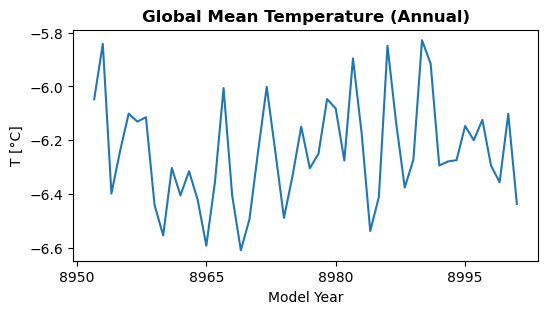

In [30]:
fig, ax = case.plot(spell)

In [45]:
spell = 'TS ~ T.isel(lev=0)|regrid'
case.calc(spell)
case.diags['TS']

>>> case.ds["T"] already loaded; to reload, run case.clear_ds("T") before case.load("T")
>>> case.diags["TS"] created


<xarray.DataArray 'TS' (time: 600, lat: 180, lon: 360)>
array([[[-27.510406, -27.510406, -27.510406, ..., -27.510406,
         -27.510406, -27.510406],
        [-27.511963, -27.511963, -27.511963, ..., -27.511963,
         -27.511963, -27.511963],
        [-27.484314, -27.484436, -27.48468 , ..., -27.48468 ,
         -27.484436, -27.484314],
        ...,
        [-69.79407 , -69.79317 , -69.79137 , ..., -69.79137 ,
         -69.79317 , -69.79407 ],
        [-69.591354, -69.591354, -69.591354, ..., -69.591354,
         -69.591354, -69.591354],
        [-69.41864 , -69.41853 , -69.41832 , ..., -69.41832 ,
         -69.41853 , -69.41864 ]],

       [[-37.18135 , -37.181335, -37.18132 , ..., -37.18132 ,
         -37.181335, -37.18135 ],
        [-37.19516 , -37.19516 , -37.19516 , ..., -37.19516 ,
         -37.19516 , -37.19516 ],
        [-37.175507, -37.1756  , -37.175766, ..., -37.175766,
         -37.1756  , -37.175507],
...
        [-76.525986, -76.52533 , -76.52402 , ..., -76.52402 ,
         -76.52533 , -76.525986],
        [-76.37891 , -76.37891 , -76.37891 , ..., -76.37891 ,
         -76.37891 , -76.37891 ],
        [-76.26279 , -76.26271 , -76.26257 , ..., -76.26257 ,
         -76.26271 , -76.26279 ]],

       [[-25.877518, -25.877518, -25.877518, ..., -25.877518,
         -25.877518, -25.877518],
        [-25.874405, -25.874405, -25.874405, ..., -25.874405,
         -25.874405, -25.874405],
        [-25.84233 , -25.842484, -25.842758, ..., -25.842758,
         -25.842484, -25.84233 ],
        ...,
        [-88.2767  , -88.276764, -88.27687 , ..., -88.27687 ,
         -88.276764, -88.2767  ],
        [-88.28923 , -88.28923 , -88.28923 , ..., -88.28923 ,
         -88.28923 , -88.28923 ],
        [-88.251465, -88.25145 , -88.2514  , ..., -88.2514  ,
         -88.25145 , -88.251465]]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
    lev      float64 3.643
  * time     (time) object 8951-01-31 00:00:00 ... 9000-12-31 00:00:00
Attributes:
    mdims:         1
    units:         °C
    long_name:     Temperature
    cell_methods:  time: mean
    path:          /glade/campaign/univ/ubrn0018/fengzhu/CESM_output/timeseri...
    gw:            <xarray.DataArray 'gw' (lat: 180, lon: 360)>\narray([[0.00...
    comp:          atm
    grid:          ne16np4

In [46]:
spell = 'TS.isel(time=-1)::gm'
case.calc(spell)
case.diags[spell]

>>> Variable `TS` is already calculated and the calculation is skipped.
>>> case.diags["TS.isel(time=-1)::gm"] created


<xarray.DataArray 'TS' ()>
array(-48.7790053)
Coordinates:
    lev      float64 3.643
    time     object 9000-12-31 00:00:00
Attributes:
    mdims:         1
    units:         °C
    long_name:     Global Mean Temperature
    cell_methods:  time: mean
    path:          /glade/campaign/univ/ubrn0018/fengzhu/CESM_output/timeseri...
    gw:            <xarray.DataArray 'gw' (lat: 180, lon: 360)>\narray([[0.00...
    comp:          atm
    grid:          ne16np4

In [48]:
import numpy as np
np.atleast_1d(case.diags[spell].data)

array([-48.7790053])